In [1]:
import numpy as np
import pandas as pd
from helper import *
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
helper = Helper()
X_train,X_test, y_train, y_test = helper.getImages()

F:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
F:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note 

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 256, 256, 3)
(799, 10)
(200, 256, 256, 3)
(200, 10)


In [4]:
# LOAD MODEL 
model = keras.models.load_model("saved_models/cnn_model")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [4]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [13]:
accuracy = []
val_accuracy = []
val_loss = []
loss = []

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss='categorical_crossentropy' , metrics = ['accuracy'])

In [12]:
epochs = 50
history = model.fit(X_train,y_train,epochs = epochs, validation_data = (X_test, y_test))
model.save("saved_models/cnn_model")

Epoch 1/50
25/25 [==============================] - 36s 1s/step - loss: 2.3031 - accuracy: 0.0964 - val_loss: 2.3024 - val_accuracy: 0.1150
Epoch 2/50
25/25 [==============================] - 35s 1s/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.3025 - val_accuracy: 0.1200
Epoch 3/50
25/25 [==============================] - 35s 1s/step - loss: 2.3023 - accuracy: 0.1026 - val_loss: 2.3022 - val_accuracy: 0.1200
Epoch 4/50
25/25 [==============================] - 35s 1s/step - loss: 2.3000 - accuracy: 0.1114 - val_loss: 2.2986 - val_accuracy: 0.1450
Epoch 5/50
25/25 [==============================] - 35s 1s/step - loss: 2.2644 - accuracy: 0.1752 - val_loss: 2.2689 - val_accuracy: 0.1350
Epoch 6/50
25/25 [==============================] - 35s 1s/step - loss: 2.1836 - accuracy: 0.2040 - val_loss: 2.2154 - val_accuracy: 0.1500
Epoch 7/50
25/25 [==============================] - 35s 1s/step - loss: 2.0590 - accuracy: 0.2516 - val_loss: 2.1817 - val_accuracy: 0.2000
Epoch 8/50
25/25 [==

In [14]:
accuracy.extend(history.history['accuracy'])
val_accuracy.extend(history.history['val_accuracy'])
loss.extend(history.history['loss'])
val_loss.extend(history.history['val_loss'])

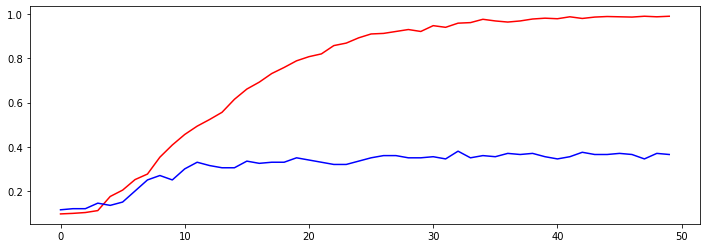

In [17]:
# Accuracy
plt.figure(figsize=(12,4))
plt.plot(accuracy,color='red')
plt.plot(val_accuracy,color='blue')

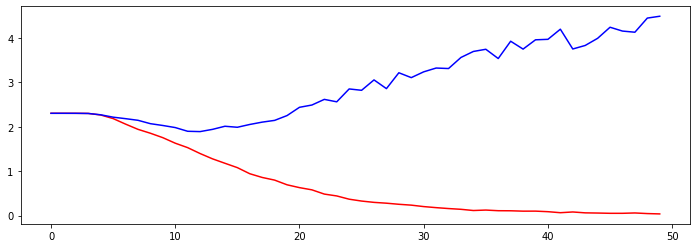

In [18]:
# Loss
plt.figure(figsize=(12,4))
plt.plot(loss,color='red')
plt.plot(val_loss,color='blue')

In [5]:
y_pred = model.predict(X_test)
y_pred = np.array([[round(j) for j in i] for i in y_pred],dtype='float64')

Accuracy:  0.33
F-Score:  0.35846823563738084


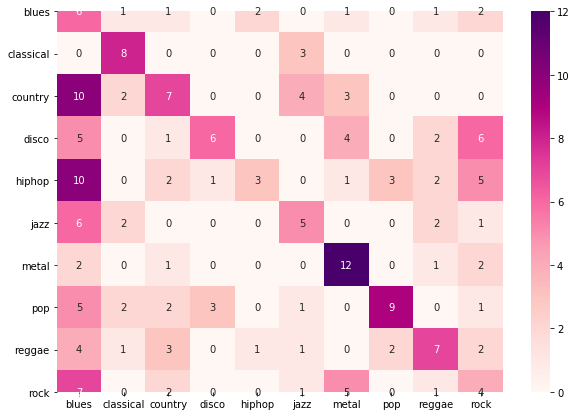

In [6]:
helper.evaluate(y_pred)